### What is Distribution-based Clustering:
- Distribution-based clustering assumes data is generated from a mixture of probability distributions such as Gaussian distributions.
- Assigns points to clusters based on statistical likelihood.
- This method supports clusters with flexible shapes and overlaps, but usually requires specifying the number of distributions.
### Algorithms:
#### Gaussian Mixture Model(GMM):
- A Gaussian Mixture Model (GMM) is a probabilistic model that assumes data points are generated from a mixture of several Gaussian(normal) distributions with unknown parameters.
- Unlike hard clustering methods such as K-Means which assigns each point to a single cluster based on the closest centroid.
- GMM performs soft clustering by assigning each point a probability of belonging to multiple clusters.
#### Working of GMM Algorithm:
- A Gaussian mixture model assumes that the data is generated from a mixture of K Gaussian distributions, each representing a cluster.
- Every Gaussian has its own mean(μ(k)), covarience Σ(k) and mixing weight π(k).
#### 1. Posterior Probability (Cluster Responsibility):
- For a given data point x(n), GMM computes the probability that it belongs to cluster k.
- P(z(n) = k/x(n)) =  π(k).N(x(n)/μ(k),Σ(k)) / Σ π(k).N(x(n)/μ(k),Σ(k))
- Where,
  - x(n) - latent variable indicating which Gaussian the point belong to.
  -  π(k)- mixing probability of the k-th Gaussian.
  -  N(x(n)/μ(k),Σ(k)) - Gaussian distribution n with mean μ(k) and covarience Σ(k).
#### 2. Likelihood of a Data Point:
- The total likelihood of observing xnx_nxn under all Gaussians is -
- P(x(n)) =  Σ π(k).N(x(n)/μ(k),Σ(k)).
#### 3. Expectation-Maximization (EM) Algorithm:
- GMMs are trained using EM algorithm, an iterative process that estimates the best parameters.
- E-step (Expectation) - Compute the responsibilty of each cluster for every data point using current parameter values.
- M-step (Maximation) - Update
  - Mean(μ(k)),
  - Covarience Σ(k) and
  - Mixing weight π(k).
  - using the responsibilities from the E-step. The process continues until the model's log-likelihood stabilizes.
#### 4. Log-Likelihood of the Mixture Model:
- The objective optimized by EM is -
- L(μ(k),Σ(k),π(k)) = ∏ Σ π(k).N(x(n)/μ(k),Σ(k)).
- EM increases this likelihood in every iteration.
#### Cluster shapes in GMM:
- In GMM, each cluster is a Gaussian defined by -
  - Mean(μ) - Center of the cluster.
  - Covariance(Σ) - Controls the shape, orientation and spread of the cluster.
- Because covariance matrics allow elliptical shapes, GMM can model -
  - elongated clusters.
  - tilted clusters.
  - overlapping clusters.
- This makes GMM more flexible than methods like K-Means, which assumes only spherical clusters.
#### Visualizing GMM often involves:
- Scatter plots showing raw data.
- Elliptical contours (or KDE curves) showing the shape of each Gaussian component.

### Implementing Gaussian Mixture Model(GMM):
#### 1. Importing Libraries:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

#### 2. Generate synthetic data
- Creates 500 points in 2D grouped around 3 centers.
- cluster_std controls how tight (or) spread each cluster is.
- y is the true label.

In [2]:
X, y = make_blobs(
    n_samples=500,
    centers=3,
    random_state=42,
    cluster_std = [1.0, 1.5, 0.8]
)

#### 3.Fit the Gaussian Mixture Model:
- fit(X) - runs the EM algorithm to learn mean, covariances and mixing weights.
- labels gives the cluster index for each point ( the component with highest posterior probability).

In [5]:
gmm = GaussianMixture(
    n_components=3, covariance_type='full',
    random_state=42
)
gmm.fit(X)
labels = gmm.predict(X)

C:\Users\techs\anaconda3\New folder\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\techs\anaconda3\New folder\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\techs\anaconda3\New folder\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\techs\anaconda3\New folder\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fd

#### 4. Plot clusters and component centers:
- Points colored by assigned cluster and red X marks showing the learned Gaussian centers.

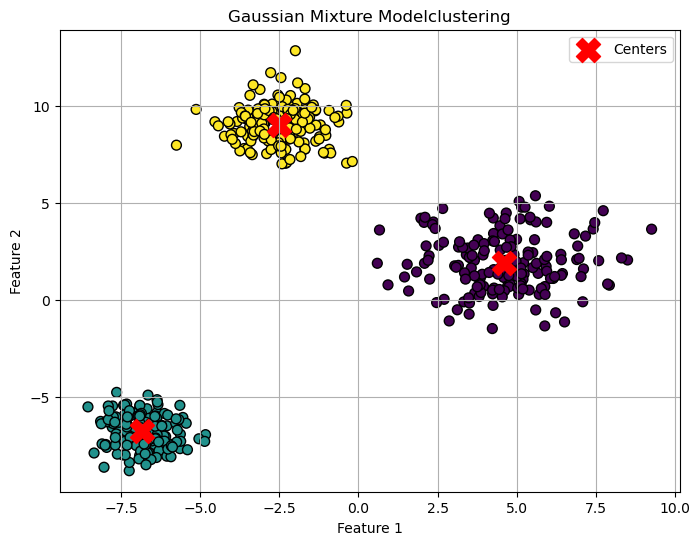

In [6]:
plt.figure(figsize=(8,6))

#scatter points colored by hard labels
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, edgecolor='k')

# plot Gaussian centers
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    s = 300,
    c = 'red',
    marker = 'X',
    label = 'Centers'
)

plt.title('Gaussian Mixture Modelclustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()